In [1]:
import numpy as np
import pandas as pd

In [2]:
# read in data file

homes_df = pd.read_csv('WestRoxbury_unprocessed.csv')
homes_df.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,None


### Basic Exploratory Analysis

In [3]:
# print the data types of each column
print(homes_df.dtypes)

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object


In [4]:
# print the shape of the dataframe
(homes_df.shape)  

(5802, 12)

In [5]:
# check for null values
homes_df.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

In [6]:
# look at each category in "REMODEL"
homes_df['REMODEL'].value_counts()

None      4346
Recent     875
Old        581
Name: REMODEL, dtype: int64

In [7]:
# look at the frequency of occurence in the "ROOMS" column
homes_df['ROOMS'].value_counts()

7     1769
6     1669
8      936
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

In [8]:
# look at the correlation between all of the predictors (be sure to only focus on the predictors, and not the target variable)
predictors_df = homes_df[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'KITCHEN', 
              'FIREPLACE', 'REMODEL']]
response_df = homes_df['TOTAL_VALUE']
#print(homes_df.corr())
predictors_df.corr()

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


### Data visualization

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

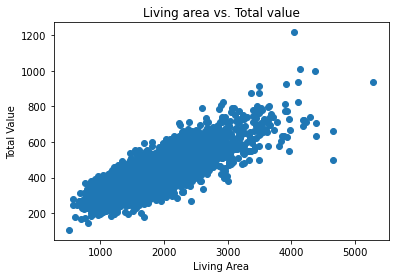

In [11]:
# plot LIVING_AREA vs. TOTAL_VALUE
plt.scatter(homes_df['LIVING_AREA'], homes_df['TOTAL_VALUE'])  
plt.xlabel("Living Area")                                   
plt.ylabel("Total Value")              
plt.title("Living area vs. Total value")
plt.show()




## Part 2: Data preprocessing

#### Drop predictors (if you feel it's necessary)

In [12]:
#print(homes_df['KITCHEN'].value_counts())

homes_df = homes_df.drop(['KITCHEN'], axis=1)   #ONLY 53 VALUES WITH 2 KITCHEN

print(homes_df.head())
homes_df.shape


   TOTAL_VALUE  LOT_SQFT  YR_BUILT  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0        344.2    9965.0      1880       1352.0     2.0      6         3   
1        412.6    6590.0      1945       1976.0     2.0     10         4   
2        330.1    7500.0      1890       1371.0     2.0      8         4   
3        498.6   13773.0      1957       2608.0     1.0      9         5   
4        331.5    5000.0      1910       1438.0     2.0      7         3   

   FULL_BATH  HALF_BATH  FIREPLACE REMODEL  
0          1          1          0    None  
1          2          1          0  Recent  
2          1          1          0    None  
3          1          1          1    None  
4          2          0          0    None  


(5802, 11)

#### Deal with NA values

In [13]:
#homes_df = homes_df.dropna(axis = 0, how='any').reset_index(drop=True)

In [14]:
homes_df2 = homes_df.dropna(axis = 0, how='any').reset_index(drop=True)
#homes_df2 = homes_df.dropna(axis = 0, subset=['LOT_SQFT', 'LIVING_AREA'])
homes_df2.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       0
YR_BUILT       0
LIVING_AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
FIREPLACE      0
REMODEL        0
dtype: int64

#### Deal with categorical variables

In [15]:
# flag categorical varibales

#homes_df2["REMODEL"] = homes_df2["REMODEL"].astype("category")
homes_df2.loc[:,"REMODEL"] = homes_df2.loc[:,"REMODEL"].astype("category")
homes_df2 = pd.get_dummies(homes_df2, drop_first= True)
homes_df2.dtypes
homes_df2.head()
print(homes_df2.shape)
homes_df2.head()

(5799, 12)


,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,0,0,0


#### Normalize data

In [16]:
from sklearn import preprocessing

In [17]:
# create a dataframe with just the predictors, and another with just the values for the response variable
# predictor_df should be helpful when you normalize the predictors below, and response_df should be helpful when you partition
# your data into train and test sets (hint: you can use "y = response_df" when you partition)

predictors_df2 = homes_df2[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 
              'FIREPLACE','REMODEL_Old', 'REMODEL_Recent']]
response_df = homes_df2['TOTAL_VALUE']




In [18]:
# normalize predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)
std_scaler = preprocessing.StandardScaler()

predictor_df_normalized = std_scaler.fit_transform(predictors_df2)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df2.columns)
predictor_df_normalized.head(10)

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.380770,-1.576306,-0.564957,0.710481,-0.692386,-0.272264,-0.568257,0.722730,-1.309419,-0.333684,-0.421262
1,0.116790,0.229535,0.589695,0.710481,2.090597,0.909517,1.347628,0.722730,-1.309419,-0.333684,2.373818
2,0.457596,-1.298484,-0.529799,0.710481,0.699105,0.909517,-0.568257,0.722730,-1.309419,-0.333684,-0.421262
3,2.806915,0.562921,1.759149,-1.537857,1.394851,2.091298,-0.568257,0.722730,0.460173,-0.333684,-0.421262
4,-0.478685,-0.742841,-0.405822,0.710481,0.003359,-0.272264,1.347628,-1.150811,-1.309419,-0.333684,-0.421262
5,-0.425505,0.368445,-1.105274,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,0.460173,2.996843,-0.421262
6,-0.478685,0.479574,0.478670,0.710481,0.003359,-0.272264,-0.568257,0.722730,-1.309419,-0.333684,-0.421262
7,1.393878,0.368445,-0.846218,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,-1.309419,-0.333684,-0.421262
8,0.208546,0.590703,-1.046061,-1.537857,-1.388132,-0.272264,-0.568257,-1.150811,0.460173,-0.333684,2.373818
9,-0.443856,-1.020663,2.469704,0.710481,0.699105,0.909517,1.347628,-1.150811,-1.309419,-0.333684,-0.421262


## Part 3: Multiple Linear Regression

### First, train and test the multiple linear regression model with sklearn

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from dmba import regressionSummary, adjusted_r2_score  # using the dmba package for perforance evaluation

In [20]:
# partition data into train and test sets
X = predictor_df_normalized
y = response_df 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# train the LR model
from sklearn import linear_model


linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [22]:
# print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.72269930231244
         Predictor  coefficient
0         LOT_SQFT    23.822365
1         YR_BUILT    -0.233548
2      LIVING_AREA    52.108562
3           FLOORS    13.538809
4            ROOMS     1.859240
5         BEDROOMS    -0.399162
6        FULL_BATH     9.555192
7        HALF_BATH    10.344114
8        FIREPLACE    11.563626
9      REMODEL_Old     2.584085
10  REMODEL_Recent     9.799949


In [23]:
# print performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.1976
            Mean Absolute Error (MAE) : 33.5544
          Mean Percentage Error (MPE) : -1.1719
Mean Absolute Percentage Error (MAPE) : 8.7431


In [24]:
# now, deploy the model on the test data
predicted_y_test = linear_model.predict(test_X)  # these are our y_hat values!!

result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})
result.head()

,Predicted,Actual,Residual
1822,327.932452,291.7,-36.232452
1998,377.860713,361.1,-16.760713
5124,384.347950,371.6,-12.747950
808,280.414613,215.5,-64.914613
4032,369.967978,325.7,-44.267978


In [25]:
# how did our model perform in prediction? Use regressionSummary()
regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : 0.0171
       Root Mean Squared Error (RMSE) : 44.9204
            Mean Absolute Error (MAE) : 33.8083
          Mean Percentage Error (MPE) : -1.3338
Mean Absolute Percentage Error (MAPE) : 8.8754


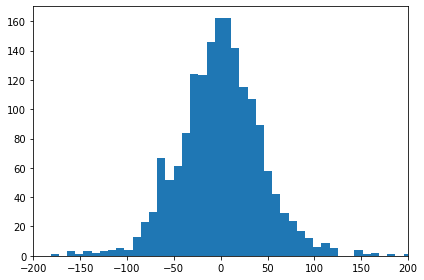

In [26]:
# let's see if our residuals are normally distributed (use matplotlib for this)
residuals = test_y - predicted_y_test

plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.tight_layout()
plt.show()

### Now, train and test the model with statsmodels

In [27]:
import statsmodels.api as sm

In [28]:
# add constant to the training and testing data (the predictors) and train model
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(train_y, train_X).fit()


In [29]:
# print the coefficients
linear_model2.params

const             392.722699
LOT_SQFT           23.822365
YR_BUILT           -0.233548
LIVING_AREA        52.108562
FLOORS             13.538809
ROOMS               1.859240
BEDROOMS           -0.399162
FULL_BATH           9.555192
HALF_BATH          10.344114
FIREPLACE          11.563626
REMODEL_Old         2.584085
REMODEL_Recent      9.799949
dtype: float64

In [30]:
# now, look at the training performance
predicted_y_training2 = linear_model2.predict(train_X)
regressionSummary(train_y, predicted_y_training2)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.1976
            Mean Absolute Error (MAE) : 33.5544
          Mean Percentage Error (MPE) : -1.1719
Mean Absolute Percentage Error (MAPE) : 8.7431


In [31]:
# now, deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)


In [32]:
# look at the testing performance
regressionSummary(test_y, predicted_y_test2)


Regression statistics

                      Mean Error (ME) : 0.0171
       Root Mean Squared Error (RMSE) : 44.9204
            Mean Absolute Error (MAE) : 33.8083
          Mean Percentage Error (MPE) : -1.3338
Mean Absolute Percentage Error (MAPE) : 8.8754


In [33]:
# look at the p-values
linear_model2.pvalues.round(4)

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.7264
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.1100
BEDROOMS          0.7019
FULL_BATH         0.0000
HALF_BATH         0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0002
REMODEL_Recent    0.0000
dtype: float64

In [34]:
# drop the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT", "ROOMS","BEDROOMS"], axis = 1)
test_X = test_X.drop(["YR_BUILT", "ROOMS","BEDROOMS"], axis = 1)

In [35]:
# train the new model and print the performance metrics for training
linear_model_new = sm.OLS(train_y, train_X).fit()
linear_model_new.params

const             392.728338
LOT_SQFT           23.868746
LIVING_AREA        53.030139
FLOORS             13.716184
FULL_BATH           9.689310
HALF_BATH          10.440555
FIREPLACE          11.558488
REMODEL_Old         2.624157
REMODEL_Recent      9.842121
dtype: float64

In [36]:
# deploy the model on the test data, and print the performance metrics for testing
predicted_y_training3 = linear_model_new.predict(train_X)
regressionSummary(train_y, predicted_y_training3)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.2132
            Mean Absolute Error (MAE) : 33.5713
          Mean Percentage Error (MPE) : -1.1745
Mean Absolute Percentage Error (MAPE) : 8.7511


In [37]:
# deploy the model on the test data, and print the performance metrics for testing
predicted_y_test3 = linear_model_new.predict(test_X)
regressionSummary(test_y, predicted_y_test3)


Regression statistics

                      Mean Error (ME) : -0.0017
       Root Mean Squared Error (RMSE) : 44.9089
            Mean Absolute Error (MAE) : 33.8337
          Mean Percentage Error (MPE) : -1.3409
Mean Absolute Percentage Error (MAPE) : 8.8899
